In [1]:
import pandas as pd
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
J_list = [100] 
M_list = [50]
G_list = [2,3,4]
I_list = [2,3]
lambda_list = [50]
p_val = {}
seed_list = [i for i in range(20)]
for J in J_list:
    for M in M_list:
        for G in G_list:
            for I in I_list:
                p_val[G,I] = {}
                p_val[G,I]['full_exact'] = []
                p_val[G,I]['real_exact'] = []
                p_val[G,I]['mult_simmult'] = []
                p_val[G,I]['real_simmult'] = []              
                for lambda_ in lambda_list:
                    for s in seed_list:
                        p_val[G,I][s] = {}
                        pval_path = f"pvalores/J{J}_M{M}_G{G}_I{I}_lambda{lambda_}/p_val/{s}.pickle"
                        # check if exists
                        if os.path.exists(pval_path):
                            with open(pval_path, 'rb') as file:
                                data = pickle.load(file)
                                p_val[G,I]['full_exact'] += list(data['p_val_full_EM'])
                                p_val[G,I]['real_exact'] += list(data['p_val_full_real'])
                                p_val[G,I]['mult_simmult'] += list(data['p_val_mult_EM'])
                                p_val[G,I]['real_simmult'] += list(data['p_val_mult_real'])
                                
                                # data about the instance
                                p_val[G,I][s]['X'] = data['X']
                                p_val[G,I][s]['b'] = data['b']
                                p_val[G,I][s]['p'] = data['p']
                                p_val[G,I][s]['p_est_full'] = data['p_est_full']
                                p_val[G,I][s]['p_est_mult'] = data['p_est_mult']
                                
                                # print(np.mean(np.abs(data['p_val_full_real'] - data['p_val_full_EM'])))
                                # print(np.mean(np.abs(data['p_val_full_real'] - data['p_val_mult_EM'])))
                                # print(np.mean(np.abs(data['p_val_full_EM'] - data['p_val_mult_EM'])))                               
                                # print('-----')
                        else:
                            print(pval_path)
                        # if I == 3:
                            # print(data['p_val_time_full_real'] + data['p_val_time_full_EM'] + data['p_val_time_mult_real'] + data['p_val_time_mult_EM'])
                        # readk pickle
                        # with open(f"/pvalores/J{J}_M{M}_G{G}_I{I}_lambda{lambda_}/{s}.pickle", 'rb') as file:

In [3]:
# big difference

max_index = np.argmax(np.abs(np.array(p_val[4,2]['real_exact'])-np.array(p_val[4,2]['real_simmult'])))

instance_num = max_index//M
ballot_box = max_index%M

print('x ', p_val[4,2][instance_num]['X'][ballot_box])
print('b ', p_val[4,2][instance_num]['b'][ballot_box])
print('-'*40)
print(p_val[4,2][instance_num]['p'])
print('-'*40)
print('real \t',p_val[4,2]['real_exact'][max_index])
print('mult \t', p_val[4,2]['real_simmult'][max_index])

x  [75 25]
b  [10 10 12 68]
----------------------------------------
[[0.11053619 0.88946381]
 [0.28597543 0.71402457]
 [0.00581504 0.99418496]
 [0.98549647 0.01450353]]
----------------------------------------
real 	 0.0793085057090406
mult 	 0.44343


# Original

# Versión con Colores


In [4]:
# # Create a 2x2 grid of subplots
# w = 0.8
# fig, axs = plt.subplots(3, 2, figsize=(w*8, w*10))  # Adjust figsize as needed

# method_1 = 'real'
# method_2 = 'mult'

# # Define colors for each subplot
# colors = ['blue', 'green', 'red', 'purple', 'orange', 'grey']

# # Iterate through G and I values
# for i, G in enumerate(G_list):
#     for j, I in enumerate(I_list):

            
#         difference = np.mean(np.abs(np.array(p_val[G, I][method_1]) - np.array(p_val[G, I][method_2])))
#         # Scatter plot of real p-values vs mult p-values with specified color
#         axs[i, j].scatter(p_val[G, I][method_1], p_val[G, I][method_2], s=4, color=colors[i * len(I_list) + j])

#         # Add axis legends only when necessary
#         if i == len(G_list) - 1:
#             axs[i, j].set_xlabel(method_1)
#         if j == 0:
#             axs[i, j].set_ylabel(method_2)

#         # Create a title box inside the graph
#         title_text = f'G = {G}, C = {I}\nDifference: {np.round(difference, 3)}'
#         axs[i, j].text(0.85, 0.1, title_text, horizontalalignment='center', verticalalignment='center',
#                        transform=axs[i, j].transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# # Adjust layout
# plt.tight_layout()

# # Show the multifigure
# plt.show()

with grading


Probability estimation gap

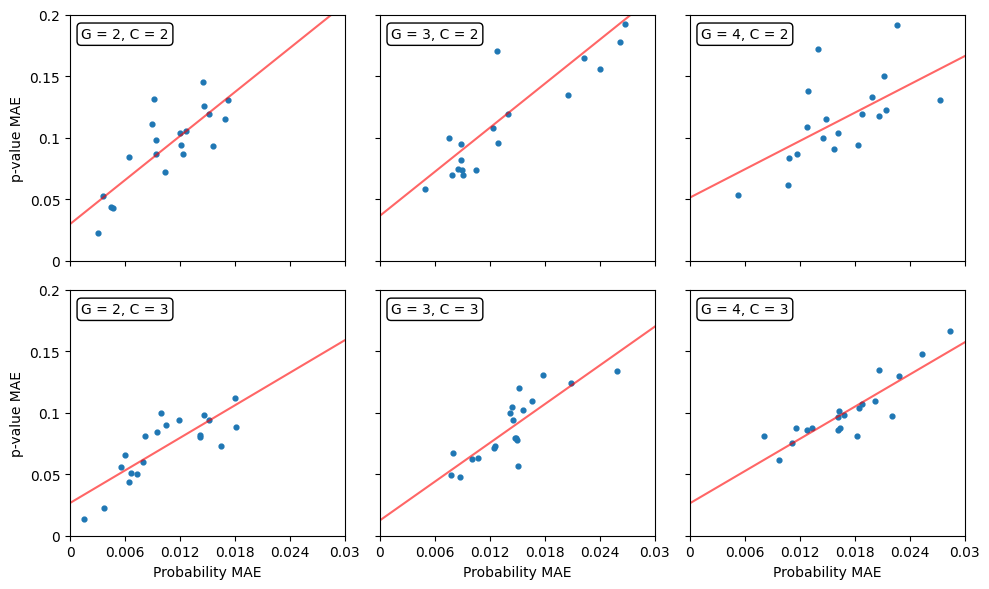

In [5]:
from matplotlib.ticker import FormatStrFormatter



fig, axs = plt.subplots(len(I_list), len(G_list), figsize=(len(G_list)*3 + 1, 6), sharex=True, sharey=True)

# Iterate through G and I values
for i, I in enumerate(I_list):
    for j, G in enumerate(G_list):
        errors = []
        mean_errors = []
        prob_errors = []
        for s in range(20):
            prob_errors += [np.mean(np.abs(p_val[G,I][s]['p_est_full'] - p_val[G,I][s]['p']))]
            for m in range(M_list[0]):
                errors.append(np.abs(p_val[G, I]['full_exact'][s*M_list[0] + m]-p_val[G, I]['real_exact'][s*M_list[0] + m]))
            mean_errors.append(np.mean(errors[s*M_list[0]:(s+1)*M_list[0]]))
        # scatter plot
        axs[i,j].scatter(prob_errors, mean_errors, s = 12)

        # Add axis legends only when necessary
        if i == len(I_list) - 1:
            axs[i, j].set_xlabel('Probability MAE')
        if j == 0:
            axs[i, j].set_ylabel('p-value MAE')

        # title_text = f'G = {G}, C = {I}\nDifference: {np.round(difference, 3)}'
        title_text = f'G = {G}, C = {I}'
        axs[i, j].text(0.2, 0.92, title_text, horizontalalignment='center', verticalalignment='center',
                       transform=axs[i, j].transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))


        # deg=1 means linear fit (i.e. polynomial of degree 1)
        b, a = np.polyfit(prob_errors, mean_errors, deg=1)

        # Plot regression line
        axs[i,j].plot([0, 0.03], [a, a + b * 0.03], color="red", lw=1.5, alpha = 0.6)
        

        axs[i, j].set_xticks(np.linspace(0, 0.03, 6))
        axs[i, j].set_yticks(np.linspace(0, 0.2, 5))

        # Use the custom tick formatter for both axes
        axs[i, j].xaxis.set_major_formatter(FormatStrFormatter('%g'))
        axs[i, j].yaxis.set_major_formatter(FormatStrFormatter('%g'))

plt.setp(axs, xlim=(0,0.03), ylim=(0,0.2))
plt.tight_layout()
plt.savefig('images/pvals/probability_gap.pdf')
plt.savefig('images/pvals/probability_gap.png', dpi = 500)


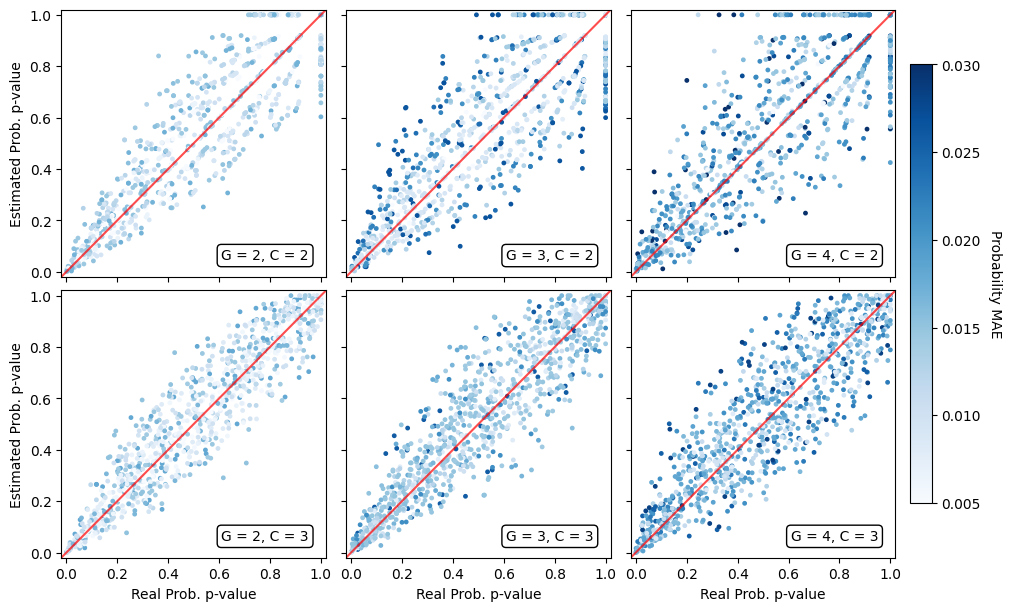

In [6]:

# Create a 2x2 grid of subplots
w = 1

fig, axs = plt.subplots(len(I_list), len(G_list), 
            figsize=(w*len(G_list)*3 + 1, w*6), sharey=True, sharex=True, layout = 'constrained')  # Adjust figsize as needed

# fig, axs = plt.subplots(len(I_list), len(G_list), 
#             figsize=(w*len(G_list)*3, w*6+1), sharey=True, sharex=True, layout = 'constrained')  # Adjust figsize as needed

# without figsize seemes to be the best, automatic adjust
# fig, axs = plt.subplots(len(I_list), len(G_list), 
#                  sharey=True, sharex=True, layout = 'constrained')  # Adjust figsize as needed


method_1, method_2 = 'real_exact', 'full_exact'
# method_1, method_2 =  'real_simmult', 'real_exact'
# method_1, method_2 = 'real_exact', 'mult_simmult'
# method_1, method_2 = 'real_simmult', 'mult_simmult'
# method_1, method_2 = 'mult_simmult', 'full_exact'

# Define colors for each subplot
# colors = ['blue', 'green', 'red', 'purple', 'orange', 'grey']


# Iterate through G and I values
for i, I in enumerate(I_list):
    for j, G in enumerate(G_list):

        error_list = []
        for s in range(20):
            error_list += [np.mean(np.abs(p_val[G,I][s]['p_est_full'] - p_val[G,I][s]['p']))]*M_list[0]

        difference = np.mean(np.abs(np.array(p_val[G, I][method_1]) - np.array(p_val[G, I][method_2])))
        # Scatter plot of real p-values vs mult p-values with specified color
        im = axs[i, j].scatter(p_val[G, I][method_1],p_val[G, I][method_2], s=6, c = error_list, cmap='Blues', vmin = 0.005, vmax = 0.03)

        # Add axis legends only when necessary
        if i == len(I_list) - 1:
            axs[i, j].set_xlabel('Real Prob. p-value')
        if j == 0:
            axs[i, j].set_ylabel('Estimated Prob. p-value')


        # Create a title box inside the graph
        # title_text = f'G = {G}, C = {I}\nDifference: {np.round(difference, 3)}'
        title_text = f'G = {G}, C = {I}'
        axs[i, j].text(0.77, 0.08, title_text, horizontalalignment='center', verticalalignment='center',
                       transform=axs[i, j].transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

        # draw a diagonal line to show where the two p-values are equal
        axs[i, j].plot([0, 1], [0, 1], transform=axs[i, j].transAxes, color='red', linestyle='-', alpha = 0.7)

# fig.colorbar(im, ax=axs, label = 'MAE (p)', orientation = 'horizontal', shrink = 0.4)
bar = fig.colorbar(im, ax=axs, label = 'p-value MAE', orientation = 'vertical', shrink = 0.8, pad = .01)
bar.set_label('Probability MAE', rotation=270, labelpad=15)
# bar.set_label(label='MAE (p)', labelpad = -46.5)
# bar.ax.set_title('MAE (p)')
# Adjust layout
# plt.tight_layout()
plt.setp(axs, xlim=(-0.02,1.02), ylim=(-0.02,1.02))
# Show the multifigure
plt.savefig('images/pvals/probability_gap_2.pdf')
plt.savefig('images/pvals/probability_gap_2.png', dpi = 500)
plt.show()

Grading according to variance (?)

P-value method gap

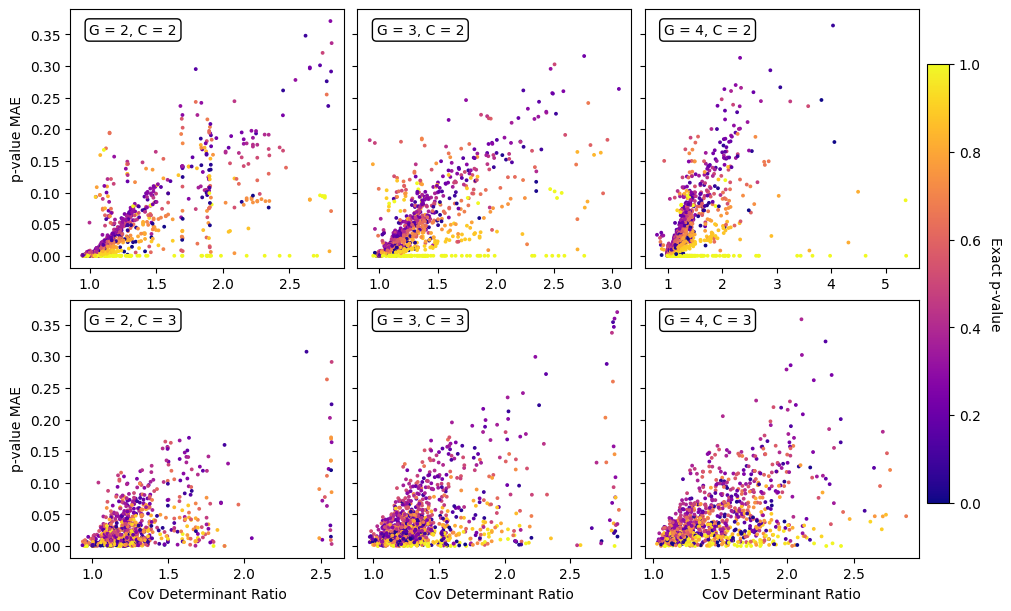

In [7]:
fig, axs = plt.subplots(len(I_list), len(G_list), figsize=(len(G_list)*3 + 1, 6), sharey=True, layout = 'constrained')

traces_ratios = np.zeros(shape=(len(G_list), len(I_list), M_list[0]*len(seed_list)))
det_ratios = np.zeros(shape=(len(G_list), len(I_list), M_list[0]*len(seed_list)))

# Iterate through G and I values
for i, I in enumerate(I_list):
    for g, G in enumerate(G_list):
        det_covs = []
        det_covs_mult = []
        traces = []
        traces_mult = []
        errors = []
        for s in range(20):
            p = p_val[G,I][s]['p_est_mult']
            p_est_mult = p_val[G,I][s]['p']
            for m in range(M_list[0]):
                b = p_val[G,I][s]['b'][m]

                # cov de la suma
                cov = np.diag(p[:,:-1].T @ b)  - p[:,:-1].T @ np.diag(b) @ p[:,:-1]
                cov_det = np.linalg.det(cov)

                det_covs.append(cov_det)
                traces.append(np.trace(cov))

                errors.append(np.abs(p_val[G, I]['real_simmult'][s*M_list[0] + m]-p_val[G, I]['real_exact'][s*M_list[0] + m]))

                r = ((p_est_mult.T @ b)/np.sum(b))[:-1,None]
                cov_mult = np.sum(b) * (np.diag(r.T[0]) - r @ r.T)

                det_covs_mult.append(np.linalg.det(cov_mult))
                traces_mult.append(np.trace(cov_mult))





        traces_ratios[g,i] = np.array(traces_mult)/np.array(traces)
        det_ratios[g,i] = np.array(det_covs_mult)/np.array(det_covs)


        im = axs[i,g].scatter(det_ratios[g,i], errors, s = 3, c = p_val[G,I]['real_exact'], cmap = 'plasma', vmin = 0, vmax = 1)

        # Add axis legends only when necessary
        if i == len(I_list) - 1:
            axs[i, g].set_xlabel('Cov Determinant Ratio')
        if g == 0:
            axs[i, g].set_ylabel('p-value MAE')


        title_text = f'G = {G}, C = {I}'
        axs[i, g].text(0.23, 0.92, title_text, horizontalalignment='center', verticalalignment='center',
                       transform=axs[i, g].transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

colorbar = fig.colorbar(im, ax = axs, shrink = 0.8, pad =.01, label = 'Exact p-value')
# colorbar = fig.colorbar(im, ax = axs, shrink = 0.8, pad =.2)
colorbar.set_label('Exact p-value', rotation=270, labelpad=15)

plt.savefig('images/pvals/method_gap.pdf')
plt.savefig('images/pvals/method_gap.png', dpi = 500)
plt.show()



Same Scale


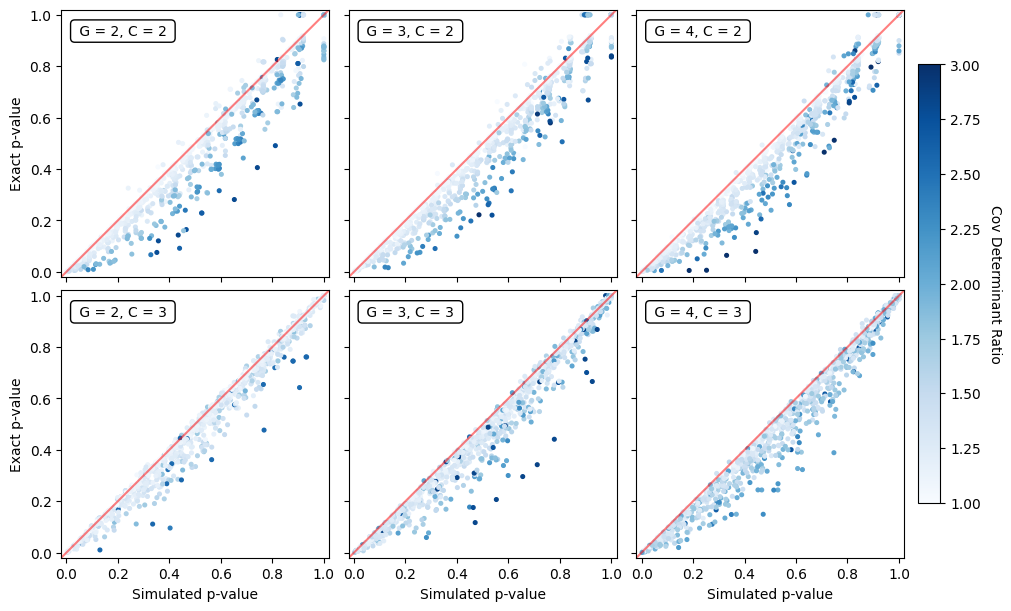

In [8]:

# Create a 2x2 grid of subplots
w = 1
use_log = False
cmap = 'Blues'
fig, axs = plt.subplots(len(I_list), len(G_list), figsize=(w*(len(G_list)*3 + 1), w*6), sharey=True, sharex=True, layout = 'constrained')  # Adjust figsize as needed

# method_1, method_2 = 'real_exact', 'full_exact'
method_1, method_2 =  'real_simmult', 'real_exact'
# method_1, method_2 = 'real_exact', 'mult_simmult'
# method_1, method_2 = 'real_simmult', 'mult_simmult'
# method_1, method_2 = 'mult_simmult', 'full_exact'

# Define colors for each subplot
# colors = ['blue', 'green', 'red', 'purple', 'orange', 'grey']


# Iterate through G and I values
for i, I in enumerate(I_list):
    for g, G in enumerate(G_list):

        # cov_list = []
        # for s in range(20):
        #     p_est = p_val[G,I][s]['p_est_mult']
        #     for m in range(M_list[0]):
        #         b = p_val[G,I][s]['b'][m]
        #         cov = np.diag(p_est[:,:-1].T @ b)  - p_est[:,:-1].T @ np.diag(b) @ p_est[:,:-1]
        #         cov_det = np.linalg.det(cov)
        #         cov_list.append(cov_det)
        

        difference = np.mean(np.abs(np.array(p_val[G, I][method_1]) - np.array(p_val[G, I][method_2])))
        # Scatter plot of real p-values vs mult p-values with specified color
        if use_log:
            im = axs[i, g].scatter(np.log10(p_val[G, I][method_1]),np.log10(p_val[G, I][method_2]), s=7, c = det_ratios[g,i], cmap=cmap, vmin = 1, vmax = 3)
        else:
            im = axs[i, g].scatter(p_val[G, I][method_1],p_val[G, I][method_2], s=7, c = det_ratios[g,i], cmap=cmap, vmin = 1, vmax = 3)
        # Add axis legends only when necessary
        if i == len(I_list) - 1:
            axs[i, g].set_xlabel('Simulated p-value')
        if g == 0:
            axs[i, g].set_ylabel('Exact p-value')


        # Create a title box inside the graph
        # title_text = f'G = {G}, C = {I}\nDifference: {np.round(difference, 3)}'
        title_text = f' G = {G}, C = {I} '
        # title_text = f'G = {G}, C = {I}'
        axs[i, g].text(0.23, 0.92, title_text, horizontalalignment='center', verticalalignment='center',
                       transform=axs[i, g].transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

        # draw a diagonal line to show where the two p-values are equal
        axs[i, g].plot([0, 1], [0, 1], transform=axs[i, g].transAxes, color='red', linestyle='-', alpha = 0.5)


# Adjust layout
# plt.tight_layout()
if use_log:
    plt.setp(axs, xlim=(-4,0), ylim=(-4,0))
else:
    plt.setp(axs, xlim=(-0.02,1.02), ylim=(-0.02,1.02))

bar = fig.colorbar(im, ax = axs, shrink = 0.8, pad =.01, label = 'Cov Determinant Ratio')
bar.set_label('Cov Determinant Ratio', rotation=270, labelpad=15)
# bar = fig.colorbar(im, ax=axs, label = 'MAE (p)', orientation = 'vertical', shrink = 0.8)
plt.savefig('images/pvals/method_gap_2.pdf')
plt.savefig('images/pvals/method_gap_2.png', dpi = 500)
# Show the multifigure
plt.show()

Diferrent Scale

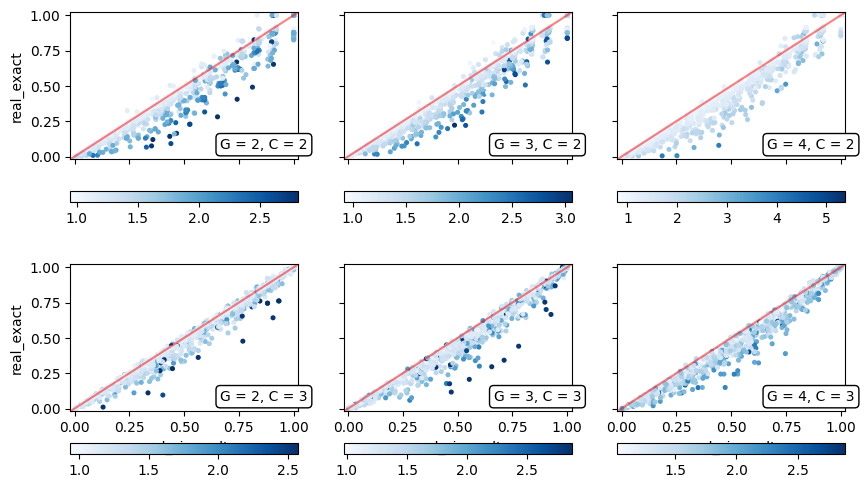

In [9]:

# Create a 2x2 grid of subplots
w = 1
use_log = False
cmap = 'Blues'
fig, axs = plt.subplots(len(I_list), len(G_list), figsize=(w*10, w*6), sharey=True, sharex=True)  # Adjust figsize as needed

# method_1, method_2 = 'real_exact', 'full_exact'
method_1, method_2 =  'real_simmult', 'real_exact'
# method_1, method_2 = 'real_exact', 'mult_simmult'
# method_1, method_2 = 'real_simmult', 'mult_simmult'
# method_1, method_2 = 'mult_simmult', 'full_exact'

# Define colors for each subplot
# colors = ['blue', 'green', 'red', 'purple', 'orange', 'grey']


# Iterate through G and I values
for i, I in enumerate(I_list):
    for g, G in enumerate(G_list):

        cov_list = []
        for s in range(20):
            p_est = p_val[G,I][s]['p_est_mult']
            for m in range(M_list[0]):
                b = p_val[G,I][s]['b'][m]
                cov = np.diag(p_est[:,:-1].T @ b)  - p_est[:,:-1].T @ np.diag(b) @ p_est[:,:-1]
                cov_det = np.linalg.det(cov)
                cov_list.append(cov_det)
        

        difference = np.mean(np.abs(np.array(p_val[G, I][method_1]) - np.array(p_val[G, I][method_2])))
        # Scatter plot of real p-values vs mult p-values with specified color
        if use_log:
            im = axs[i, g].scatter(np.log10(p_val[G, I][method_1]),np.log10(p_val[G, I][method_2]), s=7, c = det_ratios[g,i], cmap=cmap, vmin = np.min(det_ratios), vmax = np.max(det_ratios))
        else:
            im = axs[i, g].scatter(p_val[G, I][method_1],p_val[G, I][method_2], s=7, c = det_ratios[g,i], 
                                    cmap=cmap, vmin = np.min(det_ratios[g,i]), vmax = np.max(det_ratios[g,i]))
        # Add axis legends only when necessary
        if i == len(I_list) - 1:
            axs[i, g].set_xlabel(method_1)
        if g == 0:
            axs[i, g].set_ylabel(method_2)


        cbar = plt.colorbar(im, orientation="horizontal")

        # Create a title box inside the graph
        # title_text = f'G = {G}, C = {I}\nDifference: {np.round(difference, 3)}'
        title_text = f'G = {G}, C = {I}'
        axs[i, g].text(0.85, 0.1, title_text, horizontalalignment='center', verticalalignment='center',
                       transform=axs[i, g].transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

        # draw a diagonal line to show where the two p-values are equal
        axs[i, g].plot([0, 1], [0, 1], transform=axs[i, g].transAxes, color='red', linestyle='-', alpha = 0.5)


# Adjust layout
# plt.tight_layout()
if use_log:
    plt.setp(axs, xlim=(-4,0), ylim=(-4,0))
else:
    plt.setp(axs, xlim=(-0.02,1.02), ylim=(-0.02,1.02))


# plt.savefig('images/pvals/method_gap_2.pdf')

# Show the multifigure
plt.show()

# Log


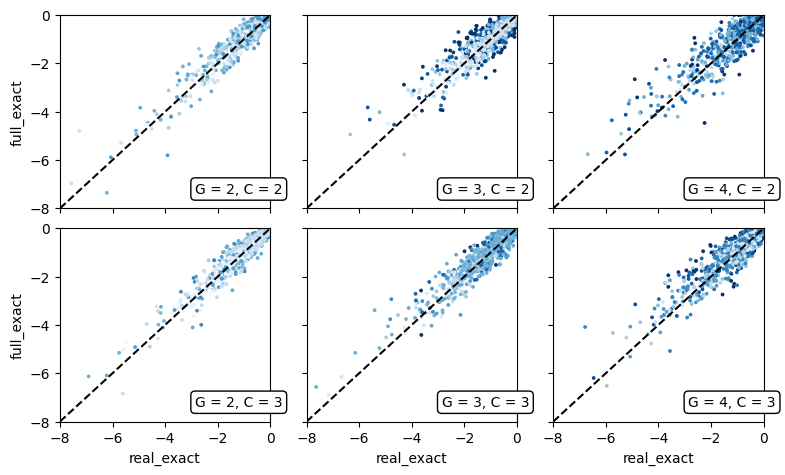

In [10]:

# Create a 2x2 grid of subplots
w = 0.8
fig, axs = plt.subplots(2, 3, figsize=(w*10, w*6), sharey=True, sharex=True)  # Adjust figsize as needed

method_1, method_2 = 'real_exact', 'full_exact'
# method_1, method_2 =  'real_simmult', 'real_exact'
# method_1, method_2 = 'real_exact', 'mult_simmult'
# method_1, method_2 = 'real_simmult', 'mult_simmult'
# method_1, method_2 = 'mult_simmult', 'full_exact'

# Define colors for each subplot
# colors = ['blue', 'green', 'red', 'purple', 'orange', 'grey']


# Iterate through G and I values
for i, I in enumerate(I_list):
    for j, G in enumerate(G_list):

        error_list = []
        for s in range(20):
            error_list += [np.mean(np.abs(p_val[G,I][s]['p_est_full'] - p_val[G,I][s]['p']))]*M_list[0]

        difference = np.mean(np.abs(np.array(p_val[G, I][method_1]) - np.array(p_val[G, I][method_2])))
        # Scatter plot of real p-values vs mult p-values with specified color
        axs[i, j].scatter(np.log(p_val[G, I][method_1]),np.log(p_val[G, I][method_2]), s=3, c = error_list, cmap='Blues', vmin = 0.005, vmax = 0.025)

        # Add axis legends only when necessary
        if i == len(I_list) - 1:
            axs[i, j].set_xlabel(method_1)
        if j == 0:
            axs[i, j].set_ylabel(method_2)


        # Create a title box inside the graph
        # title_text = f'G = {G}, C = {I}\nDifference: {np.round(difference, 3)}'
        title_text = f'G = {G}, C = {I}'
        axs[i, j].text(0.85, 0.1, title_text, horizontalalignment='center', verticalalignment='center',
                       transform=axs[i, j].transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

        # draw a diagonal line to show where the two p-values are equal
        axs[i, j].plot([0, 1], [0, 1], transform=axs[i, j].transAxes, color='black', linestyle='--')



# Adjust layout
plt.tight_layout()
plt.setp(axs, xlim=(-8,0), ylim=(-8,0))
# Show the multifigure
plt.show()

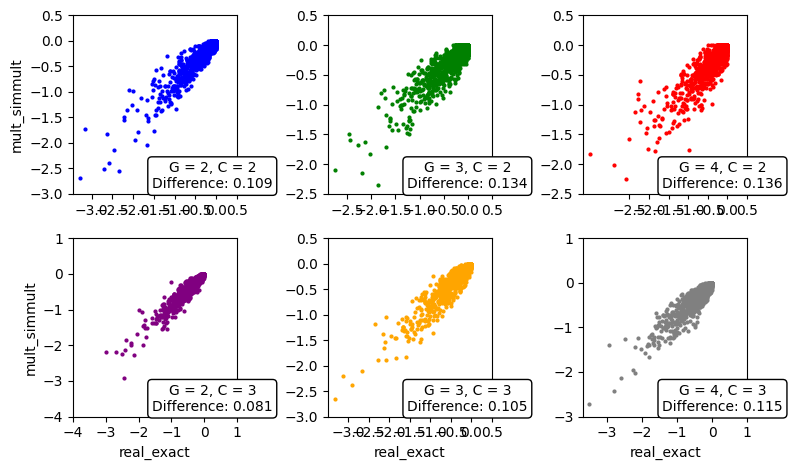

In [11]:
# Create a 2x2 grid of subplots
w = 0.8
fig, axs = plt.subplots(2, 3, figsize=(w*10, w*6))  # Adjust figsize as needed

method_1 = 'real_exact'
method_2 = 'mult_simmult'

# Define colors for each subplot
colors = ['blue', 'green', 'red', 'purple', 'orange', 'grey']

# Iterate through G and I values
for i, I in enumerate(I_list):
    for j, G in enumerate(G_list):
        difference = np.mean(np.abs(np.array(p_val[G, I][method_1]) - np.array(p_val[G, I][method_2])))
        # Scatter plot of real p-values vs mult p-values with specified color
        axs[i, j].scatter(np.log10(p_val[G, I][method_1]), np.log10(p_val[G, I][method_2]), s=4, color=colors[i * len(G_list) + j])

        # Add axis legends only when necessary
        if i == len(I_list) - 1:
            axs[i, j].set_xlabel(method_1)
        if j == 0:
            axs[i, j].set_ylabel(method_2)

        # Create a title box inside the graph
        title_text = f'G = {G}, C = {I}\nDifference: {np.round(difference, 3)}'
        axs[i, j].text(0.85, 0.1, title_text, horizontalalignment='center', verticalalignment='center',
                       transform=axs[i, j].transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

        # Set the same ticks for x and y axes
        axs[i, j].set_xticks(axs[i, j].get_yticks())
        axs[i, j].set_yticks(axs[i, j].get_xticks())

# Adjust layout
plt.tight_layout()

# Show the multifigure
plt.show()
